# Other technologies

DECIPHER supports a variety of other technologies for spatial transcriptomics, including but not limited to:
- MERFISH (see our manuscript)
- Xenium (see our manuscript)
- CosMx (see below)
- CODEX (see below)

In [2]:
import decipher
import scanpy as sc
import pandas as pd
from decipher import DECIPHER
from decipher.utils import scanpy_viz

## CosMx

We use the CosMx data from the paper: [High-plex imaging of RNA and proteins at subcellular resolution in fixed tissue by spatial molecular imaging](https://pubmed.ncbi.nlm.nih.gov/36203011/)

This slice contains ~700k cells with 960 genes

In [25]:
cosmx = sc.read_h5ad('../../../Spider-dev/benchmark/data/human_NSCLC_CosMx/data/annotated/Lung13.h5ad')

In [9]:
cosmx.X = cosmx.layers['counts'].copy()
cosmx

AnnData object with n_obs × n_vars = 71094 × 960
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'n_genes', 'Omics', 'Species', 'Tissue_0', 'Tissue_1', 'Disease', 'Platform', 'Technology', 'Index', 'batch', 'n_counts', 'leiden', 'cell_type', 'leiden_nbr_celltype', 'region'
    var: 'n_cells', 'mean', 'std'
    uns: 'cell_type_colors', 'leiden', 'leiden_colors', 'leiden_nbr_celltype_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial_', 'umap'
    obsm: 'X_nbr_celltype', 'X_pca', 'X_umap', 'X_umap_nbr_celltype', 'spatial', 'spatial_fov'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [11]:
model = DECIPHER(work_dir='./decipher_cosmx')
model.register_data(cosmx)

2025-06-20 15:59:16.560 | SUCCESS  | decipher.utils:global_seed:332 - Global seed set to 0.
2025-06-20 15:59:16.566 | DEBUG    | decipher.data.process:omics_data_process:68 - adata 0 has 71094 cells, 960 genes.
2025-06-20 15:59:16.572 | INFO     | decipher.data.process:omics_data_process:86 - Input: 1 slice(s) with 71094 cells and 1 batches.
2025-06-20 15:59:16.573 | INFO     | decipher.data.process:_preprocess_adata:98 - Preprocessing 71094 cells.
2025-06-20 15:59:16.767 | WARNING  | decipher.data.process:_preprocess_adata:113 - hvg:2000 >= n_vars:960, set all genes as HVGs.
/flash/grp/gglab/xiacr/DECIPHER-dev/conda/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
2025-06-20 15:59:19.825 | SUCCESS  | decipher.data.process:_preprocess_adata:148 - Preprocessing finished in 3.25 seconds.
2025-06-20 15:59:21.960 | SUCCESS  | decipher.graphic.build:build_graph:102 - Built knn graph with 71094

In [12]:
model.fit_omics()
gex_embedding = model.center_emb
nbr_embedding = model.nbr_emb

2025-06-20 15:59:27.096 | INFO     | decipher.emb:sc_emb:157 - Not found pre-trained model: list index out of range
2025-06-20 15:59:27.099 | INFO     | decipher.emb:_update_config:37 - Using 960 genes as model input.
2025-06-20 15:59:27.106 | DEBUG    | decipher.nn.models._basic:__init__:37 - {'model_dir': 'pretrain', 'fix_sc': False, 'spatial_emb': 'attn', 'transformer_layers': 3, 'num_heads': 1, 'dropout': 0.1, 'prj_dims': [128, 32, 32], 'temperature_center': 0.07, 'temperature_nbr': 0.07, 'lr_base': 0.01, 'lr_min': 0.001, 'weight_decay': 1e-05, 'first_cycle_steps': 831, 'warmup_steps': 83, 'epochs': 3, 'nbr_loss_weight': 0.5, 'plot': False, 'plot_hist': False, 'device': 'auto', 'select_gpu': True, 'device_num': 1, 'fp16': True, 'patient': 10, 'log_every_n_steps': 1, 'gradient_clip_val': 5.0, 'check_val_every_n_epoch': 1, 'max_steps': 831, 'augment': {'dropout_gex': 0.5, 'dropout_nbr_prob': -1, 'mask_hop': -1, 'max_neighbor': 21}, 'emb_dim': 128, 'gex_dims': [960, 256, 128], 'marker

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 15:59:36.007 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 15:59:36.027 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved. New best score: 1.115
Epoch 0, global step 277: 'train/total_loss' reached 1.11548 (best 1.11548), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_cosmx/pretrain/epoch=0-step=277.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 15:59:41.608 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 15:59:41.630 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.171 >= min_delta = 0.0. New best score: 0.944
Epoch 1, global step 554: 'train/total_loss' reached 0.94401 (best 0.94401), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_cosmx/pretrain/epoch=1-step=554.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 15:59:47.297 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 15:59:47.311 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.148 >= min_delta = 0.0. New best score: 0.796
Epoch 2, global step 831: 'train/total_loss' reached 0.79581 (best 0.79581), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_cosmx/pretrain/epoch=2-step=831.ckpt' as top 3
`Trainer.fit` stopped: `max_steps=831` reached.
2025-06-20 15:59:47.768 | SUCCESS  | decipher.nn.trainer:fit:113 - Train finished in 20.11s.
2025-06-20 15:59:47.769 | INFO     | decipher.emb:_update_config:37 - Using 960 genes as model input.
/flash/grp/gglab/xiacr/DECIPHER-dev/conda/lib/python3.11/site-packages/torch_geometric/data/lightning/datamodule.py:43: The 'shuffle=True' option is ignored in 'LightningSpatialMNNData'. Remove it from the argument list to disable this warning
202

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:00:15.483 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:00:15.498 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2025-06-20 16:00:15.500 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:00:15.505 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved. New best score: 1.613
Epoch 0, global step 277: 'train/total_loss' reached 1.61313 (best 1.61313), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_cosmx/model/epoch=0-step=277.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:00:40.308 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:00:40.323 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2025-06-20 16:00:40.324 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:00:40.329 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.287 >= min_delta = 0.0. New best score: 1.326
Epoch 1, global step 554: 'train/total_loss' reached 1.32637 (best 1.32637), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_cosmx/model/epoch=1-step=554.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:01:05.053 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:01:05.067 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2025-06-20 16:01:05.068 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:01:05.073 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.138 >= min_delta = 0.0. New best score: 1.188
Epoch 2, global step 831: 'train/total_loss' reached 1.18810 (best 1.18810), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_cosmx/model/epoch=2-step=831.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:01:29.560 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:01:29.574 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2025-06-20 16:01:29.575 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:01:29.580 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Epoch 3, global step 1108: 'train/total_loss' reached 1.19467 (best 1.18810), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_cosmx/model/epoch=3-step=1108.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:01:54.380 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:01:54.411 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2025-06-20 16:01:54.413 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:01:54.418 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.072 >= min_delta = 0.0. New best score: 1.116
Epoch 4, global step 1385: 'train/total_loss' reached 1.11565 (best 1.11565), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_cosmx/model/epoch=4-step=1385.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:02:19.190 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:02:19.219 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2025-06-20 16:02:19.221 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:02:19.226 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.023 >= min_delta = 0.0. New best score: 1.092
Epoch 5, global step 1662: 'train/total_loss' reached 1.09247 (best 1.09247), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_cosmx/model/epoch=5-step=1662.ckpt' as top 3
`Trainer.fit` stopped: `max_steps=1662` reached.
2025-06-20 16:02:20.995 | SUCCESS  | decipher.nn.trainer:fit:113 - Train finished in 152.73s.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:02:24.822 | INFO     | decipher.cls:fit_omics:177 - Results saved to decipher_cosmx


In [13]:
cosmx.obsm['X_center'] = gex_embedding
cosmx.obsm['X_nbr'] = nbr_embedding
cosmx = scanpy_viz(cosmx, ['center', 'nbr'], rapids=False)

2025-06-20 16:02:29.239 | INFO     | decipher.utils:select_free_gpu:295 - Using GPU [1, 0] as computation device.


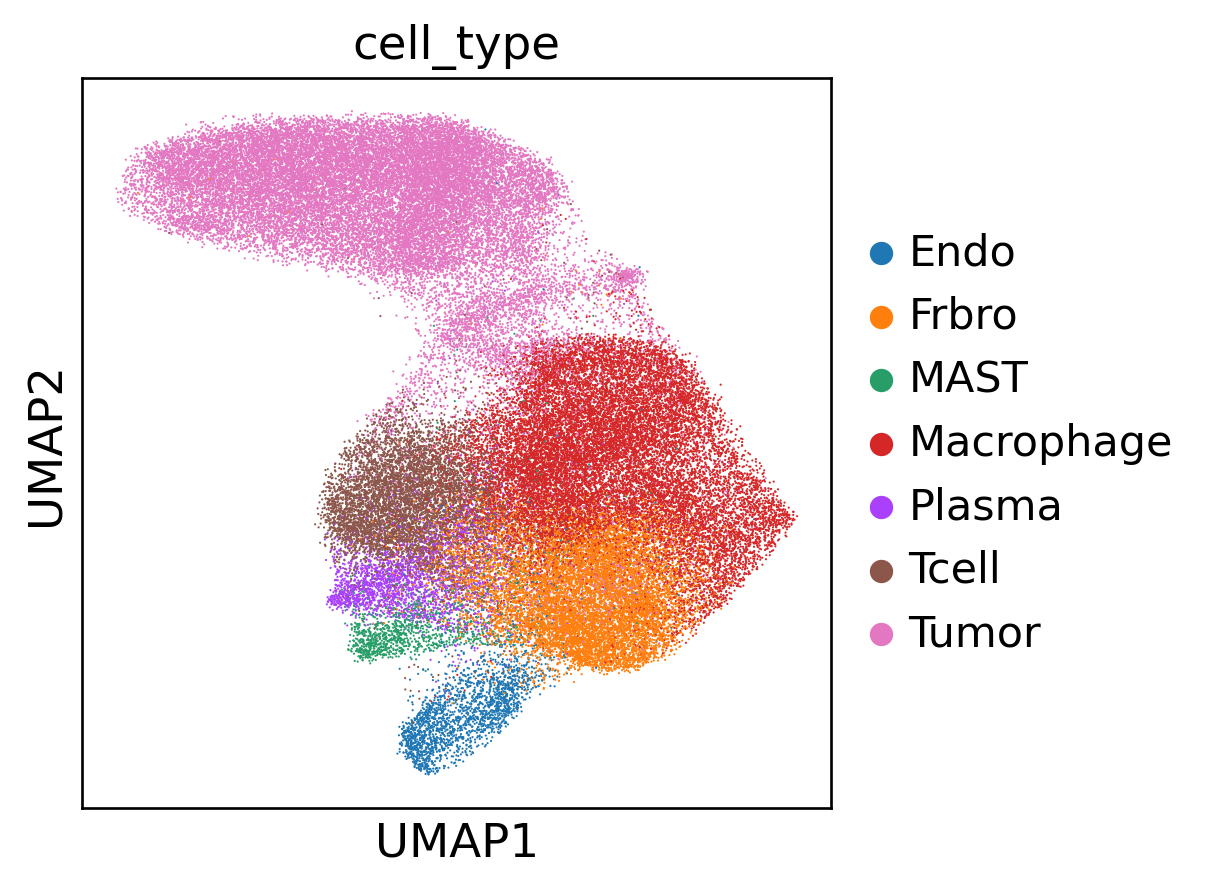

In [14]:
cosmx.obsm['X_umap'] = cosmx.obsm['X_umap_center'].copy()
sc.pl.umap(cosmx, color=['cell_type'])

In [26]:
cosmx.obs['region'] = 'Region-' + cosmx.obs['leiden'].astype(str)

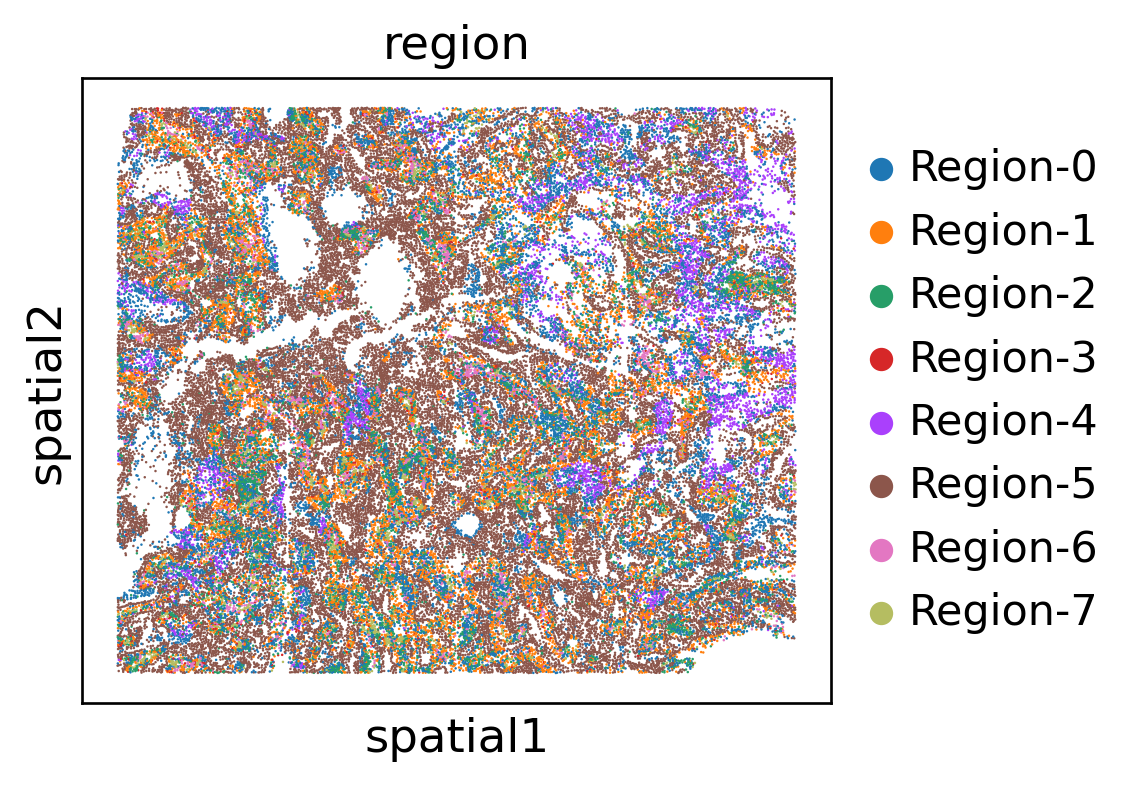

In [27]:
# cosmx.obsm['X_umap'] = cosmx.obsm['X_umap_nbr'].copy()
sc.pl.spatial(cosmx, color=['region'], spot_size=80)

## CODEX
We use the CODEX showd in [Seurat tutorial](https://satijalab.org/seurat/articles/seurat5_spatial_vignette_2#human-lymph-node-akoya-codex-system) (from https://app.globus.org/file-manager?origin_id=af603d86-eab9-4eec-bb1d-9d26556741bb&origin_path=%2Fc95d9373d698faf60a66ffdc27499fe1%2Fdrv_CX_20-008_lymphnode_n10_reg001%2Fprocessed_2020-12-2320-008LNn10r001%2Fsegm%2Fsegm-1%2Ffcs%2Fcompensated%2F)

This data contains ~180k cells with 28 channels (proteins)

In [3]:
df = pd.read_csv('./LN7910_20_008_11022020_reg001_compensated.csv')


In [4]:
df.head()

cell_id:cell_id  region:region  tile_num:tile_num  x:x  y:y  z:z  \
0                1              1                  1    0   35    0   
1                2              1                  1    0   58    0   
2                3              1                  1   11   16    0   
3                4              1                  1    2   78    0   
4                5              1                  1    0  186    0   

   x_tile:x_tile  y_tile:y_tile  size:size  cyc001_ch001:DAPI-01  ...  \
0              0             35        252           3310.841270  ...   
1              0             58        168           3548.982143  ...   
2             11             16        472           3271.690678  ...   
3              2             78        204           3900.813725  ...   
4              0            186        184           3557.576087  ...   

   cyc012_ch002:Empty  cyc012_ch003:CD5  cyc012_ch004:CD1c  \
0           25.424603       2616.575397         219.369048   
1           30.821429       1316.398810          83.398810   
2           33.824153       1573.379237          68.144068   
3           46.470588        957.465686         101.593137   
4           31.135870       2493.706522         103.733696   

   cyc013_ch001:DAPI-13  cyc013_ch002:Blank  cyc013_ch003:Blank  \
0           4316.603175          145.150794         2553.150794   
1           4396.845238          132.089286         2457.708333   
2           3855.362288          146.904661         2473.086864   
3           4725.897059          141.676471         2805.235294   
4           5087.902174          156.603261         2853.277174   

   cyc013_ch004:Blank  tsne_x:tsne_x  tsne_y:tsne_y  homogeneity:homogeneity  
0          586.170635     -10.111384       1.329884                 4.940698  
1          582.702381      -5.833877      10.265185                 5.079799  
2          575.338983      -4.819608      -3.919313                 5.122119  
3          625.181373     -14.063901       9.582250                 4.097429  
4          695.146739       6.660976     -14.633474                 4.527107  

[5 rows x 64 columns]

In [5]:
# df.head()
# fitler the cols whose name starts with 'cyc'
feature = df.loc[:, df.columns.str.startswith('cyc')]
# filter out cols contains 'Blank' and 'DAPI'
feature = feature.loc[:, ~feature.columns.str.contains('Blank|DAPI|Empty')]

In [6]:
codex = sc.AnnData(X=feature.values)
codex.var = pd.DataFrame(index=feature.columns)
codex.obsm['spatial'] = df[['x:x', 'y:y']].values
codex

AnnData object with n_obs × n_vars = 188450 × 28
    obsm: 'spatial'

In [7]:
from muon import prot as pt
pt.pp.clr(codex)

In [8]:
sc.pp.scale(codex, max_value=10)

In [12]:
codex.X = codex.X.astype('float32')

In [13]:
model = DECIPHER(work_dir='./decipher_codex')
model.register_data(codex, preprocess=False)

2025-06-20 16:30:02.611 | WARNING  | decipher.cls:__init__:49 - decipher_codex already exists but `recover` is False.
2025-06-20 16:30:02.626 | SUCCESS  | decipher.utils:global_seed:332 - Global seed set to 0.
2025-06-20 16:30:02.628 | WARNING  | decipher.cls:register_data:108 - Skip preprocessing, make sure the input data is ready.
2025-06-20 16:30:05.332 | SUCCESS  | decipher.graphic.build:build_graph:102 - Built knn graph with 188450 nodes and 3769000 edges, 20.00 edges/node.


In [14]:
model.fit_omics()
gex_embedding = model.center_emb
nbr_embedding = model.nbr_emb

2025-06-20 16:30:06.138 | INFO     | decipher.emb:sc_emb:157 - Not found pre-trained model: list index out of range
2025-06-20 16:30:06.141 | INFO     | decipher.emb:_update_config:37 - Using 28 genes as model input.
2025-06-20 16:30:06.144 | DEBUG    | decipher.nn.models._basic:__init__:37 - {'model_dir': 'pretrain', 'fix_sc': False, 'spatial_emb': 'attn', 'transformer_layers': 3, 'num_heads': 1, 'dropout': 0.1, 'prj_dims': [128, 32, 32], 'temperature_center': 0.07, 'temperature_nbr': 0.07, 'lr_base': 0.01, 'lr_min': 0.001, 'weight_decay': 1e-05, 'first_cycle_steps': 2208, 'warmup_steps': 200, 'epochs': 3, 'nbr_loss_weight': 0.5, 'plot': False, 'plot_hist': False, 'device': 'auto', 'select_gpu': True, 'device_num': 1, 'fp16': True, 'patient': 10, 'log_every_n_steps': 1, 'gradient_clip_val': 5.0, 'check_val_every_n_epoch': 1, 'max_steps': 2208, 'augment': {'dropout_gex': 0.5, 'dropout_nbr_prob': -1, 'mask_hop': -1, 'max_neighbor': 21}, 'emb_dim': 128, 'gex_dims': [28, 256, 128], 'marke

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:30:17.118 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:30:17.148 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved. New best score: 3.103
Epoch 0, global step 736: 'train/total_loss' reached 3.10262 (best 3.10262), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_codex/pretrain/epoch=0-step=736.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:30:27.089 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:30:27.119 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.007 >= min_delta = 0.0. New best score: 3.096
Epoch 1, global step 1472: 'train/total_loss' reached 3.09583 (best 3.09583), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_codex/pretrain/epoch=1-step=1472.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:30:42.897 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:30:42.932 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.188 >= min_delta = 0.0. New best score: 2.908
Epoch 2, global step 2208: 'train/total_loss' reached 2.90752 (best 2.90752), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_codex/pretrain/epoch=2-step=2208.ckpt' as top 3
`Trainer.fit` stopped: `max_steps=2208` reached.
2025-06-20 16:30:43.197 | SUCCESS  | decipher.nn.trainer:fit:113 - Train finished in 36.83s.
2025-06-20 16:30:43.198 | INFO     | decipher.emb:_update_config:37 - Using 28 genes as model input.
/flash/grp/gglab/xiacr/DECIPHER-dev/conda/lib/python3.11/site-packages/torch_geometric/data/lightning/datamodule.py:43: The 'shuffle=True' option is ignored in 'LightningSpatialMNNData'. Remove it from the argument list to disable this warning
2

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:31:42.060 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:31:42.092 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2025-06-20 16:31:42.093 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:31:42.102 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved. New best score: 2.307
Epoch 0, global step 736: 'train/total_loss' reached 2.30658 (best 2.30658), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_codex/model/epoch=0-step=736.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:32:37.553 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:32:37.586 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2025-06-20 16:32:37.588 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:32:37.596 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.049 >= min_delta = 0.0. New best score: 2.258
Epoch 1, global step 1472: 'train/total_loss' reached 2.25759 (best 2.25759), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_codex/model/epoch=1-step=1472.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:33:33.959 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:33:33.990 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2025-06-20 16:33:33.992 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:33:34.000 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Epoch 2, global step 2208: 'train/total_loss' reached 2.37143 (best 2.25759), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_codex/model/epoch=2-step=2208.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:34:30.486 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:34:30.518 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2025-06-20 16:34:30.520 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:34:30.528 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.026 >= min_delta = 0.0. New best score: 2.231
Epoch 3, global step 2944: 'train/total_loss' reached 2.23122 (best 2.23122), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_codex/model/epoch=3-step=2944.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:35:29.432 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:35:29.462 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2025-06-20 16:35:29.463 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:35:29.471 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Epoch 4, global step 3680: 'train/total_loss' reached 2.23444 (best 2.23122), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_codex/model/epoch=4-step=3680.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:36:26.742 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:36:26.772 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2025-06-20 16:36:26.774 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2025-06-20 16:36:26.782 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.013 >= min_delta = 0.0. New best score: 2.219
Epoch 5, global step 4416: 'train/total_loss' reached 2.21861 (best 2.21861), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_codex/model/epoch=5-step=4416.ckpt' as top 3
`Trainer.fit` stopped: `max_steps=4416` reached.
2025-06-20 16:36:28.304 | SUCCESS  | decipher.nn.trainer:fit:113 - Train finished in 344.78s.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: |          | 0/? [00:00<?, ?it/s]

2025-06-20 16:36:34.101 | INFO     | decipher.cls:fit_omics:177 - Results saved to decipher_codex


In [20]:
codex.obsm['X_center'] = gex_embedding
codex.obsm['X_nbr'] = nbr_embedding
codex = scanpy_viz(codex, ['center', 'nbr'], rapids=False)

2025-06-20 16:39:49.506 | INFO     | decipher.utils:select_free_gpu:295 - Using GPU [1, 0] as computation device.


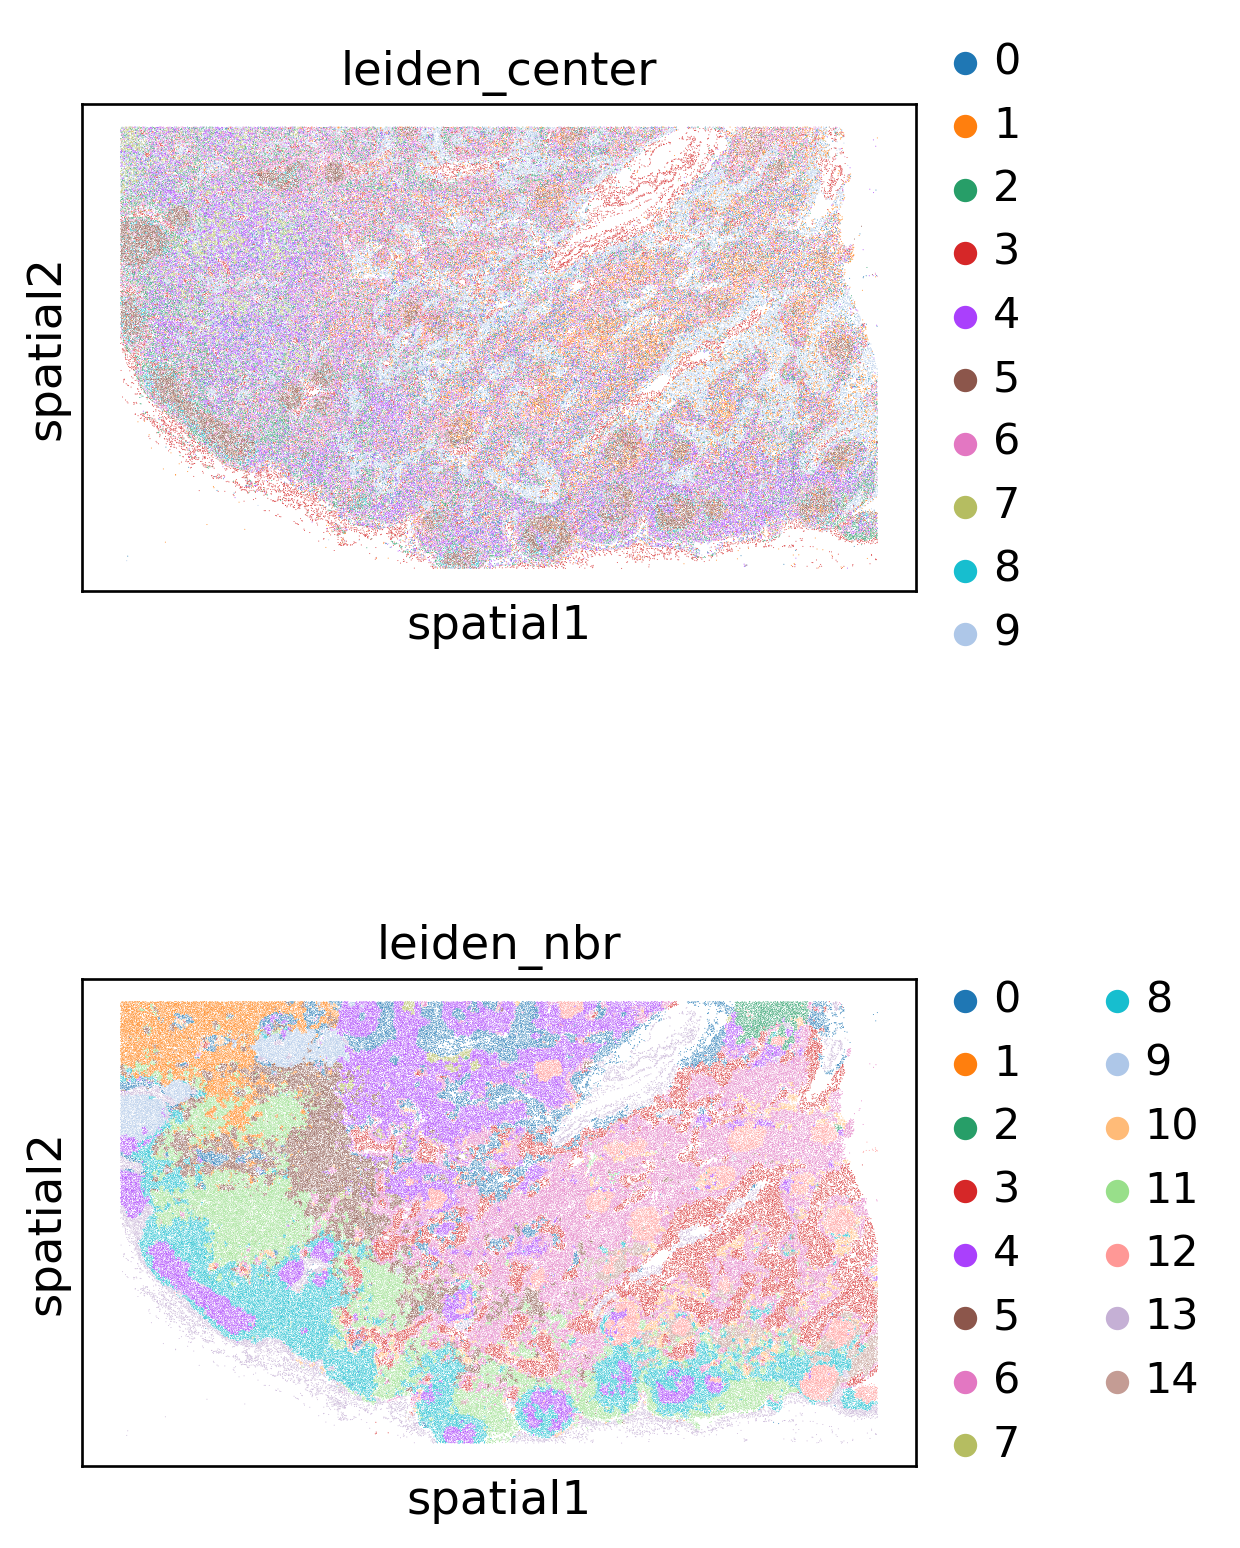

In [21]:
sc.pl.spatial(codex, color=['leiden_center', 'leiden_nbr'], spot_size=15, ncols=1)

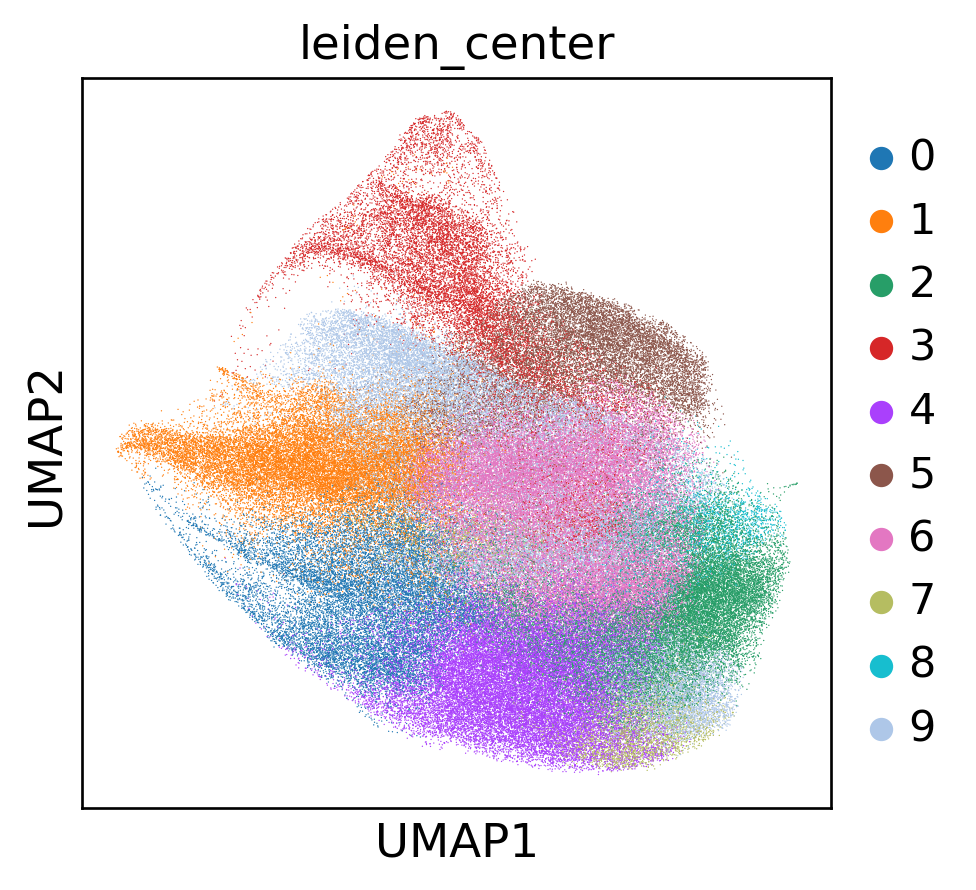

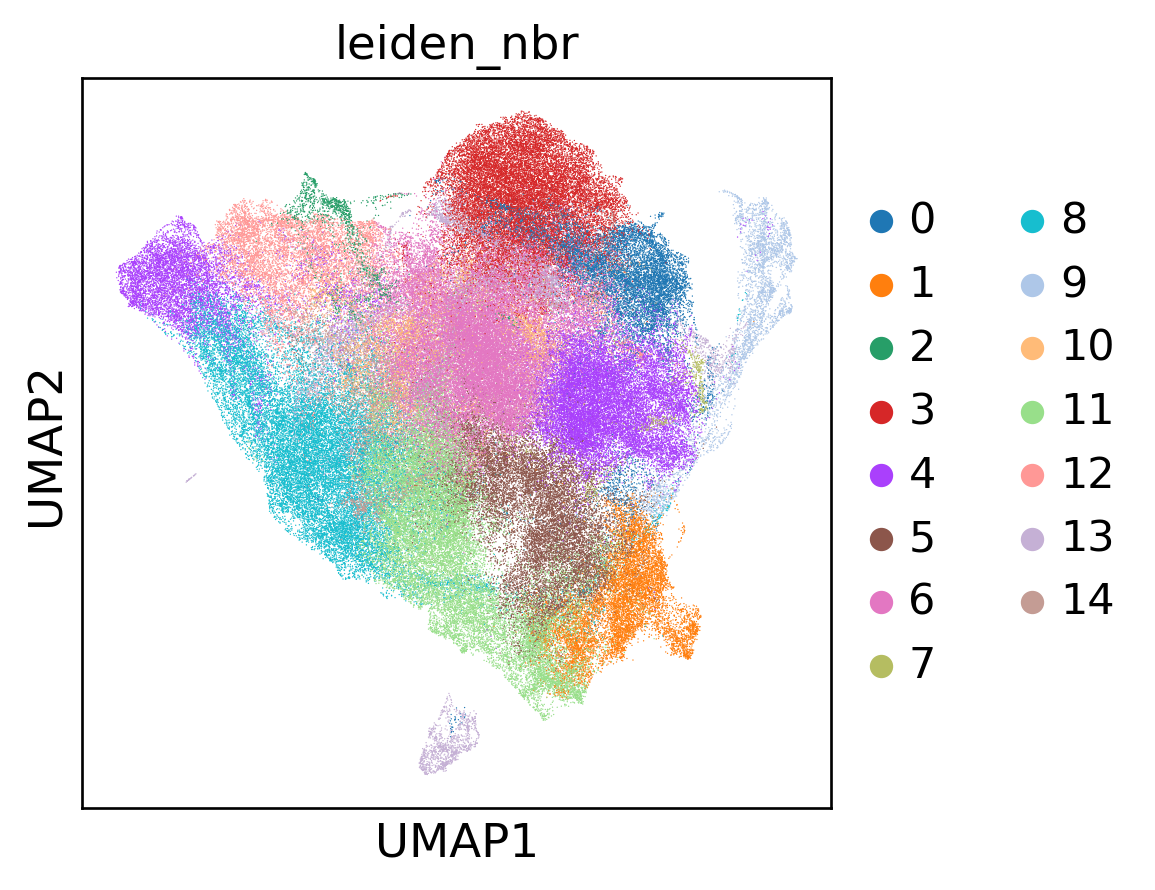

In [24]:
codex.obsm['X_umap'] = codex.obsm['X_umap_center'].copy()
sc.pl.umap(codex, color=['leiden_center'], ncols = 1)
codex.obsm['X_umap'] = codex.obsm['X_umap_nbr'].copy()
sc.pl.umap(codex, color=['leiden_nbr'], ncols = 1)
